In [ ]:
# USe ! to install libraries in Colab
!pip install yfinance

In [ ]:
# https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html
# install technical analysis library. It utilises numpy and pandas
# You can use any other library if you are aware of

! pip install ta

In [ ]:
# import all features
from ta import add_all_ta_features
# OR
# import only what you need
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.trend import ADXIndicator
from ta.volatility import AverageTrueRange
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volume import VolumeWeightedAveragePrice

In [ ]:
import yfinance as yf
# yfinance an open source library. Thanks to Ran Aroussi. However, yahoo finance only for educational purposes. Dont download data
# https://pypi.org/project/yfinance/
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo. Intraday only for 60 days

import math
import pandas as pd
import numpy as np

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
#NSElist . Dont run
list = ["BRITANNIA.NS", "ULTRACEMCO.NS","KOTAKBANK.NS", "HEROMOTOCO.NS" , "BAJAJ-AUTO.NS", "GRASIM.NS","ONGC.NS", "TITAN.NS" , "SHREECEM.NS" ,\
        "NESTLEIND.NS", "GAIL.NS", "CIPLA.NS", "BHARTIARTL.NS" ,"NTPC.NS", "TATASTEEL.NS", "COALINDIA.NS", "BAJFINANCE.NS", "ICICIBANK.NS",\
       "BAJAJFINSV.NS", "WIPRO.NS", "HINDALCO.NS" , "HDFCLIFE.NS", "MARUTI.NS", "RELIANCE.NS", "TCS.NS", "LT.NS", "INDUSINDBK.NS", "ITC.NS" , "TECHM.NS"]

In [ ]:
#NSElist . Dont run
list = ["BRITANNIA", "ULTRACEMCO","KOTAKBANK", "HEROMOTOCO" , "BAJAJ-AUTO", "GRASIM","ONGC", "TITAN" , "SHREECEM" ,\
        "NESTLEIND", "GAIL", "CIPLA", "BHARTIARTL" ,"NTPC", "TATASTEEL", "COALINDIA", "BAJFINANCE", "ICICIBANK",\
       "BAJAJFINSV", "WIPRO", "HINDALCO" , "HDFCLIFE", "MARUTI", "RELIANCE", "TCS", "LT", "INDUSINDBK", "ITC" , "TECHM"]

In [ ]:
#SGX Stock list. Dont run
list = ["C52.SI", "T39.SI", "S68.SI", "G13.SI", "V03.SI" , "U11.SI", "C07.SI" , "D05.SI", "Z74.SI",\
        "D01.SI", "O39.SI", "S63.SI", "A17U.SI" , "BN4.SI","BS6.SI", "M44U.SI", "C31.SI", "H78.SI", \
        "Y92.SI", "C38U.SI", "U14.SI", "N2IU.SI" , "F34.SI" , "C09.SI" , "J36.SI", "S58.SI" , "C6L.SI", "J37.SI", "U96.SI" ,"1810.HK"]

In [ ]:
# You can find the symbols in yahoofinance
# example for DBS https://sg.finance.yahoo.com/quote/D05.SI/

stock_symbol = "D05.SI"
benchmark_symbol = "^STI"
start="2022-01-01"
end="2022-06-29"
period = "1y"

<Axes: xlabel='Date'>

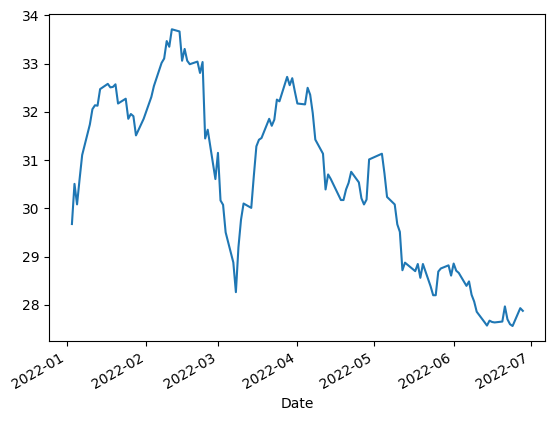

In [ ]:
#stock check
stock_data = yf.Ticker(stock_symbol)
hist_stock = stock_data.history(start=start,end=end)
hist_stock["Close"].plot()

<Axes: xlabel='Date'>

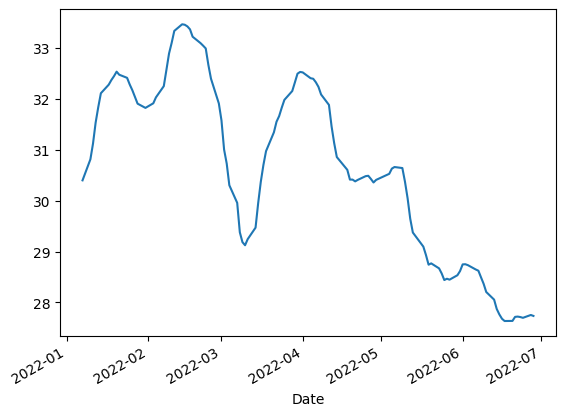

In [ ]:
# initialise the SMA indicator
# class ta.trend.SMAIndicator(close: pandas.core.series.Series, window: int, fillna: bool = False)

# Calculating a 5 day MA
indicator = SMAIndicator(close = hist_stock["Close"], window= 5, fillna= False)
MA_5 = indicator.sma_indicator()
MA_5.plot()

In [ ]:
# To plot a better way
# https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

import matplotlib.pyplot as plt

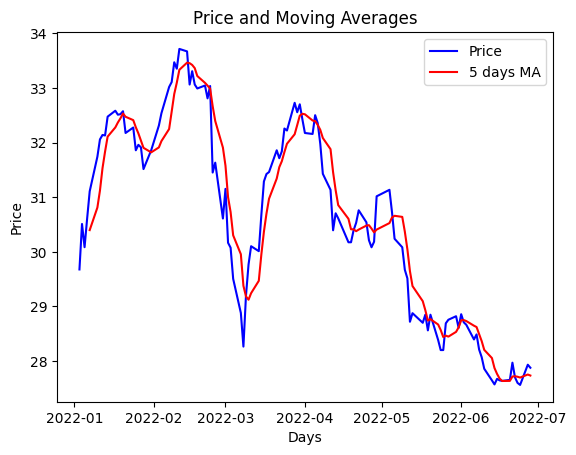

In [ ]:
# Plot Price Vs 5 MA
plt.plot(hist_stock["Close"], color='b', label='Price')
plt.plot(MA_5, color='r', label='5 days MA')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Price and Moving Averages")
plt.legend()
plt.show()

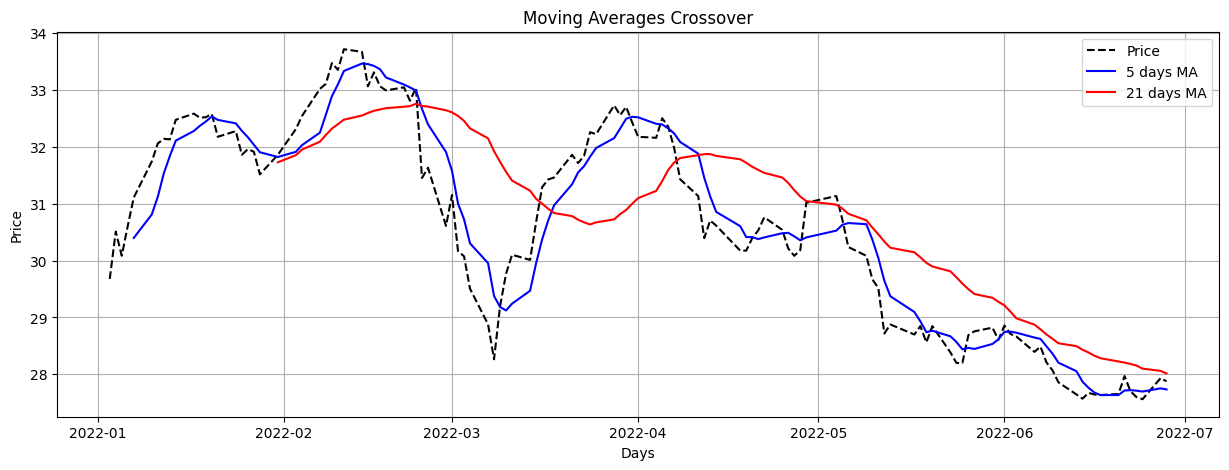

In [ ]:
# To plot a crossover of 5 Vs 21 days
indicator_1 = SMAIndicator(close = hist_stock["Close"], window= 5, fillna= False)
MA_5 = indicator_1.sma_indicator()

indicator_2 = SMAIndicator(close = hist_stock["Close"], window= 21, fillna= False)
MA_21 = indicator_2.sma_indicator()

# Plot 5 MA Vs 21 MA along with price
plt.figure(figsize=(15, 5))
plt.plot(hist_stock["Close"] ,color='black', label='Price', linestyle='dashed')
plt.plot(MA_5, color='b', label='5 days MA')
plt.plot(MA_21, color='r', label='21 days MA')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Moving Averages Crossover")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Making functions for the important indicators
def RSI(data, window):
  D = RSIIndicator(close = data['Close'], window= window, fillna= False)
  RSI = D.rsi()
  return round(RSI,1)

def MovingAverage(data, window):
  C = SMAIndicator(close = data['Close'], window= window, fillna= False)
  MA = C.sma_indicator()
  return round(MA,1)

def Trend(data, window):
  A= ADXIndicator(high = data['High'], low= data['Low'], close= data['Close'], window= window, fillna= False)
  DI_plus = A.adx_pos()
  DI_neg = A.adx_neg()
  ADX = A.adx()
  return round(ADX,1), round(DI_plus,1), round(DI_neg,1)

def ATR(data, window):
   B = AverageTrueRange(high = data['High'], low= data['Low'], close= data['Close'], window= window, fillna= False)
   ATR = B.average_true_range()
   return round(ATR,1)

def VWAP(data,window):
   E = VolumeWeightedAveragePrice(high = data['High'], low= data['Low'], close= data['Close'],volume = data['Volume'], window= window, fillna= False)
   VWAP = E.volume_weighted_average_price()[-1]
   return round(VWAP,1)


In [ ]:
def MovingAverage(data, window):
  #initialise the indicator
  C = SMAIndicator(close = data['Close'], window= window, fillna= False)
  #call the sma_indicator method to get the SMA
  MA = C.sma_indicator()
  return round(MA,1)

<Axes: xlabel='Date'>

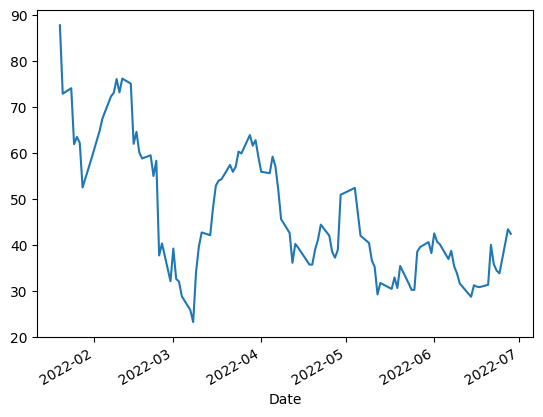

In [ ]:
RSI(hist_stock,14).plot()

In [ ]:
#get the last value bt [-1]
RSI(hist_stock,14)[-1]

42.4

<Axes: xlabel='Date'>

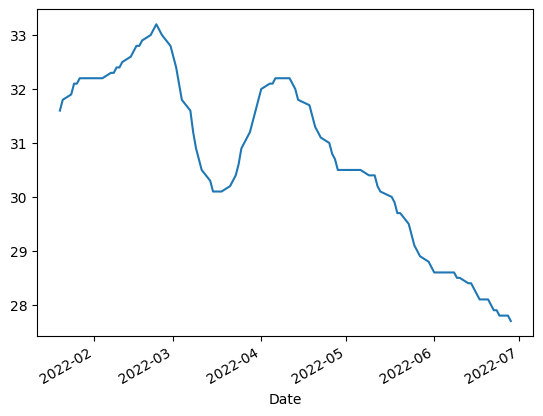

In [ ]:
MovingAverage(hist_stock,14).plot()

<Axes: xlabel='Date'>

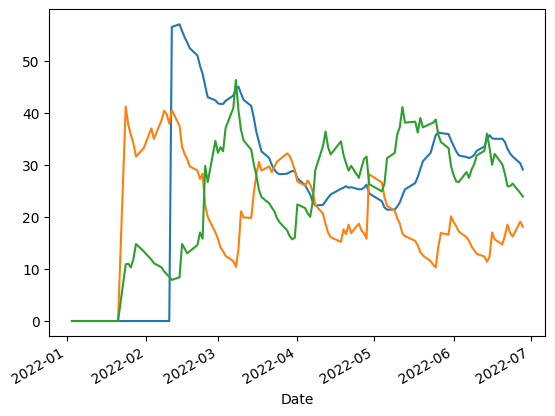

In [ ]:
A = Trend(hist_stock,14)
A[0].plot()
A[1].plot()
A[2].plot()

<Axes: xlabel='Date'>

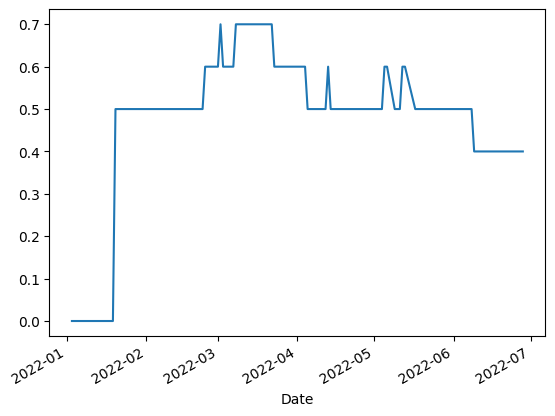

In [ ]:
ATR(hist_stock,14).plot()

In [ ]:
RSI(hist_stock,14).dropna()

Date
2022-01-20 00:00:00+08:00    87.8
2022-01-21 00:00:00+08:00    72.9
2022-01-24 00:00:00+08:00    74.1
2022-01-25 00:00:00+08:00    61.9
2022-01-26 00:00:00+08:00    63.5
                             ... 
2022-06-22 00:00:00+08:00    35.8
2022-06-23 00:00:00+08:00    34.4
2022-06-24 00:00:00+08:00    33.8
2022-06-27 00:00:00+08:00    43.4
2022-06-28 00:00:00+08:00    42.4
Name: rsi, Length: 108, dtype: float64